In [27]:
# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import linear_model, metrics 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()


NameError: name 'saveas' is not defined

In [47]:
conda install -c https://conda.anaconda.org/plotly plotly

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Reading dataset and storing it in a dataframe
dataset = pd.read_csv('US_Accidents_June20.csv')

In [3]:
# To get the info of the training dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [50]:
# Checking For Categorical Features
cols = ['ID','Source','TMC','Severity','Start_Time','End_Time','Start_Lat','Start_Lng','End_Lat','End_Lng','Distance(mi)',
        'Description','Number','Street','Side','City','County','State','Zipcode','Country','Timezone','Airport_Code',
        'Weather_Timestamp','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction',
        'Wind_Speed(mph)','Precipitation(in)','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction',
        'No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset',
        'Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']

In [4]:
print("Unique count of categorical features:")
for i in cols:
  print(i,dataset[i].unique().size)

Unique count of categorical features:


NameError: name 'cols' is not defined

In [10]:
# Droppig Categorical Features
dataset_new1 = dataset.drop(['Country','Turning_Loop'], axis=1)

In [11]:
# To get the info of the new dataset
dataset_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Timezone               object 
 20  Airport_Code           object 
 21  Weather_Timestamp      object 
 22  Temperature(F)    

In [12]:
# dropping useless features
dataset_new2 = dataset_new1.drop(columns=['ID','TMC','Source','Number','End_Lat','End_Lng',
                                    'Description','Distance(mi)', 'End_Time', 'Timezone', 'Weather_Timestamp'], axis=1)

In [13]:
# To get the info of the new dataset
dataset_new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 36 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   Start_Lat              float64
 3   Start_Lng              float64
 4   Street                 object 
 5   Side                   object 
 6   City                   object 
 7   County                 object 
 8   State                  object 
 9   Zipcode                object 
 10  Airport_Code           object 
 11  Temperature(F)         float64
 12  Wind_Chill(F)          float64
 13  Humidity(%)            float64
 14  Pressure(in)           float64
 15  Visibility(mi)         float64
 16  Wind_Direction         object 
 17  Wind_Speed(mph)        float64
 18  Precipitation(in)      float64
 19  Weather_Condition      object 
 20  Amenity                bool   
 21  Bump                   bool   
 22  Crossing          

In [14]:
# Handling Missing Data
dataset_new2.isnull().sum()

Severity                       0
Start_Time                     0
Start_Lat                      0
Start_Lng                      0
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Airport_Code                6758
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitation(in)        2025874
Weather_Condition          76138
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway                        0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Ca

In [15]:
# Dropping Wind_Chill(F), Precipitation(in) features
dataset_new3 = dataset_new2.drop(columns=['Wind_Chill(F)', 'Precipitation(in)'], axis=1)

In [16]:
# To get the info of the new dataset
dataset_new3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   Start_Lat              float64
 3   Start_Lng              float64
 4   Street                 object 
 5   Side                   object 
 6   City                   object 
 7   County                 object 
 8   State                  object 
 9   Zipcode                object 
 10  Airport_Code           object 
 11  Temperature(F)         float64
 12  Humidity(%)            float64
 13  Pressure(in)           float64
 14  Visibility(mi)         float64
 15  Wind_Direction         object 
 16  Wind_Speed(mph)        float64
 17  Weather_Condition      object 
 18  Amenity                bool   
 19  Bump                   bool   
 20  Crossing               bool   
 21  Give_Way               bool   
 22  Junction          

In [17]:
# Corelation
dataset_new3.corr()

Severity  Start_Lat  Start_Lng  Temperature(F)  Humidity(%)  \
Severity         1.000000   0.047617   0.083705       -0.027275     0.034319   
Start_Lat        0.047617   1.000000  -0.013994       -0.426281     0.043792   
Start_Lng        0.083705  -0.013994   1.000000       -0.062612     0.180237   
Temperature(F)  -0.027275  -0.426281  -0.062612        1.000000    -0.338446   
Humidity(%)      0.034319   0.043792   0.180237       -0.338446     1.000000   
Pressure(in)     0.038380  -0.097927   0.149430       -0.021035     0.111987   
Visibility(mi)  -0.006433  -0.050276  -0.047535        0.181930    -0.383524   
Wind_Speed(mph)  0.034959   0.053761   0.084480       -0.006743    -0.145336   
Amenity         -0.044494   0.042062  -0.004948       -0.003184    -0.003766   
Bump            -0.004671   0.003300  -0.009044        0.000312    -0.002543   
Crossing        -0.138368  -0.021648   0.009782        0.038213    -0.051412   
Give_Way        -0.007747  -0.001637   0.017186        0.000151     0.002729   
Junction         0.060086   0.033115  -0.061057       -0.006240    -0.004308   
No_Exit         -0.006705   0.000233  -0.002869        0.003883    -0.009505   
Railway         -0.023492  -0.000314  -0.023936        0.005700    -0.002668   
Roundabout      -0.003956  -0.000280   0.000794       -0.001042     0.001720   
Station         -0.048260   0.016133  -0.011009        0.003489    -0.002931   
Stop            -0.053500   0.011216  -0.040357        0.000846    -0.013165   
Traffic_Calming -0.006073   0.009136  -0.006283       -0.001218    -0.000303   
Traffic_Signal  -0.191531  -0.091752   0.087513        0.062006    -0.034939   

                 Pressure(in)  Visibility(mi)  Wind_Speed(mph)   Amenity  \
Severity             0.038380       -0.006433         0.034959 -0.044494   
Start_Lat           -0.097927       -0.050276         0.053761  0.042062   
Start_Lng            0.149430       -0.047535         0.084480 -0.004948   
Temperature(F)      -0.021035        0.181930        -0.006743 -0.003184   
Humidity(%)          0.111987       -0.383524        -0.145336 -0.003766   
Pressure(in)         1.000000       -0.011895         0.001116  0.011444   
Visibility(mi)      -0.011895        1.000000         0.015562  0.006790   
Wind_Speed(mph)      0.001116        0.015562         1.000000 -0.002495   
Amenity              0.011444        0.006790        -0.002495  1.000000   
Bump                -0.005200        0.004603         0.000202  0.002738   
Crossing            -0.032661        0.035228         0.009477  0.117296   
Give_Way             0.000845        0.003828         0.000131  0.006551   
Junction             0.030009       -0.000397         0.007489 -0.027440   
No_Exit             -0.010040        0.011710         0.000817  0.020344   
Railway              0.010748        0.003072        -0.004385  0.048898   
Roundabout           0.001675        0.000043        -0.001370  0.000288   
Station              0.020313        0.007013        -0.000071  0.186981   
Stop                -0.008713        0.005939         0.003431  0.033104   
Traffic_Calming     -0.000389        0.003219        -0.002342  0.007892   
Traffic_Signal      -0.010831        0.029827         0.017276  0.104357   

                     Bump  Crossing  Give_Way  Junction   No_Exit   Railway  \
Severity        -0.004671 -0.138368 -0.007747  0.060086 -0.006705 -0.023492   
Start_Lat        0.003300 -0.021648 -0.001637  0.033115  0.000233 -0.000314   
Start_Lng       -0.009044  0.009782  0.017186 -0.061057 -0.002869 -0.023936   
Temperature(F)   0.000312  0.038213  0.000151 -0.006240  0.003883  0.005700   
Humidity(%)     -0.002543 -0.051412  0.002729 -0.004308 -0.009505 -0.002668   
Pressure(in)    -0.005200 -0.032661  0.000845  0.030009 -0.010040  0.010748   
Visibility(mi)   0.004603  0.035228  0.003828 -0.000397  0.011710  0.003072   
Wind_Speed(mph)  0.000202  0.009477  0.000131  0.007489  0.000817 -0.004385   
Amenity          0.002738  0

NameError: name 'savefig' is not defined

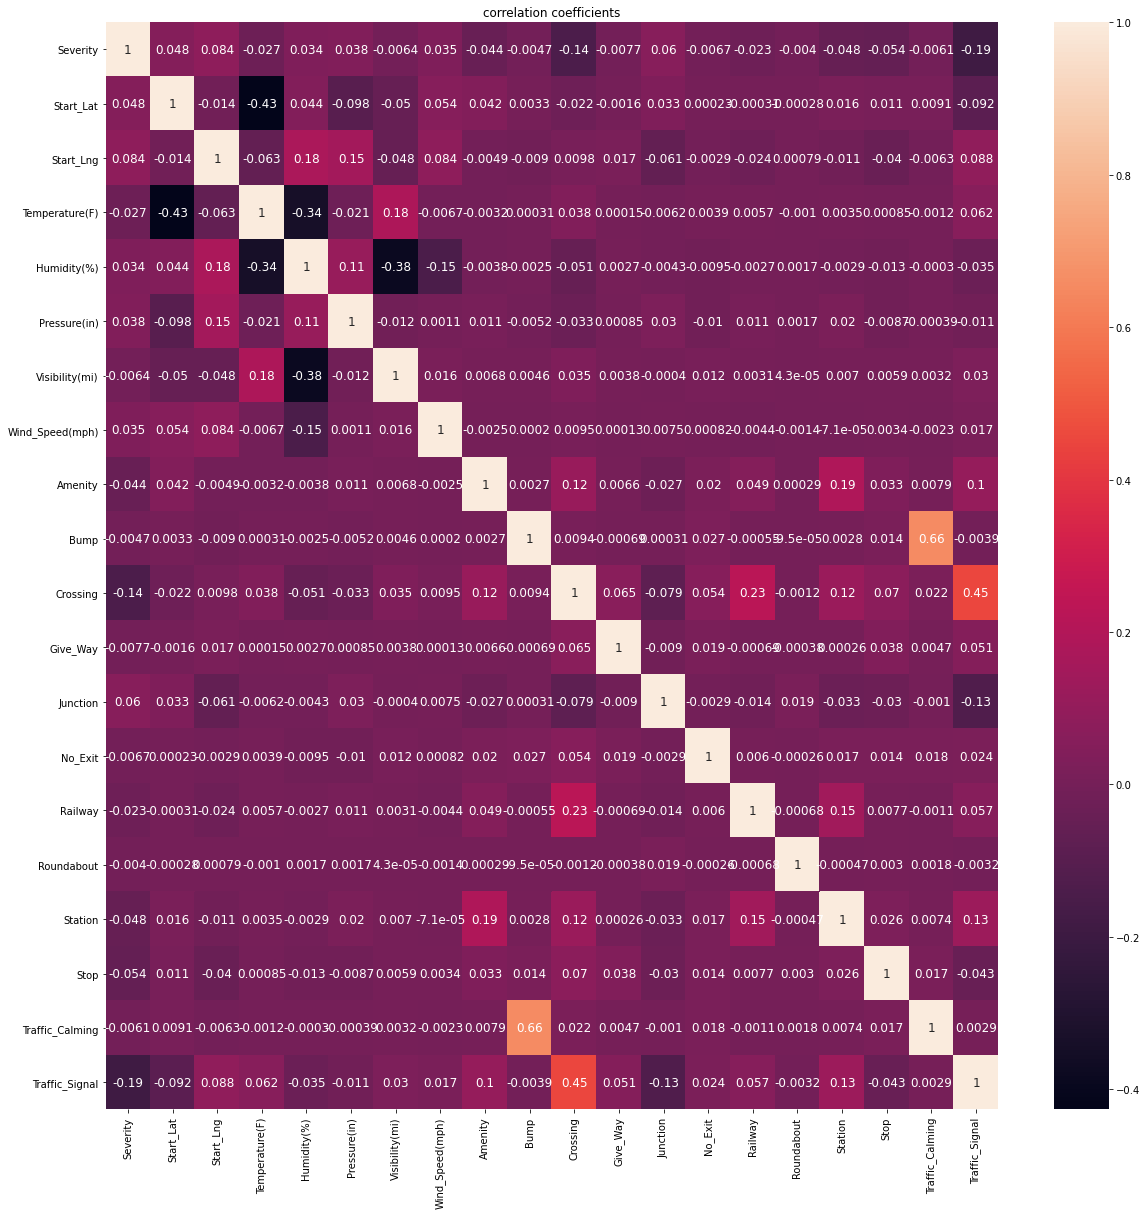

In [28]:
# HeatMap 
plt.figure(figsize=(20,20))
x=sns.heatmap(dataset_new3.corr(), annot=True, annot_kws={'size': 12})
plt.title('correlation coefficients')
savefig(x,'corr.png')

In [19]:
# Drop Features with least realtion to the Target: Severity
dataset_new4 = dataset_new3.drop(columns=['Visibility(mi)','Bump','Give_Way','No_Exit','Roundabout','Traffic_Calming'], axis=1)

In [30]:
# To get the info of the new dataset
dataset_new4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   Start_Lat              float64
 3   Start_Lng              float64
 4   Street                 object 
 5   Side                   object 
 6   City                   object 
 7   County                 object 
 8   State                  object 
 9   Zipcode                object 
 10  Airport_Code           object 
 11  Temperature(F)         float64
 12  Humidity(%)            float64
 13  Pressure(in)           float64
 14  Wind_Direction         object 
 15  Wind_Speed(mph)        float64
 16  Weather_Condition      object 
 17  Amenity                bool   
 18  Crossing               bool   
 19  Junction               bool   
 20  Railway                bool   
 21  Station                bool   
 22  Stop              

In [31]:
# Checking Null value
dataset_new4.isnull().sum()

Severity                      0
Start_Time                    0
Start_Lat                     0
Start_Lng                     0
Street                        0
Side                          0
City                        112
County                        0
State                         0
Zipcode                    1069
Airport_Code               6758
Temperature(F)            65732
Humidity(%)               69687
Pressure(in)              55882
Wind_Direction            58874
Wind_Speed(mph)          454609
Weather_Condition         76138
Amenity                       0
Crossing                      0
Junction                      0
Railway                       0
Station                       0
Stop                          0
Traffic_Signal                0
Sunrise_Sunset              115
Civil_Twilight              115
Nautical_Twilight           115
Astronomical_Twilight       115
dtype: int64

In [32]:
dataset_new5 = dataset_new4.dropna()

In [33]:
# Checking Null values
dataset_new5.isnull().sum()

Severity                 0
Start_Time               0
Start_Lat                0
Start_Lng                0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Airport_Code             0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Crossing                 0
Junction                 0
Railway                  0
Station                  0
Stop                     0
Traffic_Signal           0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64

In [34]:
# State wise count
dataset_new5.State.value_counts()

CA    676011
TX    290733
FL    232315
SC    146568
NY    144272
NC    142518
IL     94171
MI     89508
PA     88712
GA     78958
OR     78917
VA     78063
MN     75693
AZ     66609
TN     62076
OH     59762
WA     58573
OK     56842
LA     56046
NJ     48941
CO     44322
UT     43547
AL     39658
MD     33364
MA     33304
MO     30606
IN     29650
CT     23170
NE     21457
KY     20563
WI     18492
RI     10443
IA     10215
NV      8739
NH      6827
MS      5678
DE      5448
KS      5167
NM      4934
DC      3760
ME      1991
WV      1850
AR      1761
ID      1731
VT       573
WY       445
MT       438
SD        59
ND        39
Name: State, dtype: int64

In [35]:
dataset_new5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3033519 entries, 2 to 3513616
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   Start_Lat              float64
 3   Start_Lng              float64
 4   Street                 object 
 5   Side                   object 
 6   City                   object 
 7   County                 object 
 8   State                  object 
 9   Zipcode                object 
 10  Airport_Code           object 
 11  Temperature(F)         float64
 12  Humidity(%)            float64
 13  Pressure(in)           float64
 14  Wind_Direction         object 
 15  Wind_Speed(mph)        float64
 16  Weather_Condition      object 
 17  Amenity                bool   
 18  Crossing               bool   
 19  Junction               bool   
 20  Railway                bool   
 21  Station                bool   
 22  Stop              

In [36]:
dataset_new5.describe()

Severity     Start_Lat     Start_Lng  Temperature(F)   Humidity(%)  \
count  3.033519e+06  3.033519e+06  3.033519e+06    3.033519e+06  3.033519e+06   
mean   2.332613e+00  3.656764e+01 -9.558495e+01    6.241765e+01  6.414094e+01   
std    5.504645e-01  4.948028e+00  1.720250e+01    1.869854e+01  2.263540e+01   
min    1.000000e+00  2.455527e+01 -1.246238e+02   -2.900000e+01  1.000000e+00   
25%    2.000000e+00  3.356905e+01 -1.172966e+02    5.000000e+01  4.800000e+01   
50%    2.000000e+00  3.604750e+01 -9.043865e+01    6.400000e+01  6.600000e+01   
75%    3.000000e+00  4.056412e+01 -8.099274e+01    7.630000e+01  8.300000e+01   
max    4.000000e+00  4.900220e+01 -6.711317e+01    1.706000e+02  1.000000e+02   

       Pressure(in)  Wind_Speed(mph)  
count  3.033519e+06     3.033519e+06  
mean   2.970493e+01     8.220226e+00  
std    8.657919e-01     5.246204e+00  
min    0.000000e+00     0.000000e+00  
25%    2.968000e+01     5.000000e+00  
50%    2.993000e+01     7.000000e+00  
75%    3.008000e+01     1.150000e+01  
max    5.774000e+01     9.840000e+02

In [37]:
df= dataset_new5

In [70]:
cols5 = ['Severity','Start_Time','Start_Lat','Start_Lng','Street','Side','City','State',',County','Zipcode','Airport_Code',
        'Temperature(F)','Humidity(%)','Pressure(in)','Wind_Direction',
        'Wind_Speed(mph)','Weather_Condition','Amenity','Crossing','Junction',
        'Railway','Station','Stop','Traffic_Signal','Sunrise_Sunset',
        'Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']

In [38]:
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()

In [39]:
cols5_toLe = ['Start_Time','Street','Side','City','County','Zipcode','Airport_Code','Wind_Direction',
              'Weather_Condition','Amenity','Crossing','Junction','Railway','Station','Stop','Traffic_Signal',
              'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']

In [40]:
for col in cols5_toLe:
    df[col] = labelencoder.fit_transform(df[col])
    labelencoder = LabelEncoder()
df

<ipython-input-40-53383a895869>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = labelencoder.fit_transform(df[col])


Severity  Start_Time  Start_Lat   Start_Lng  Street  Side   City  \
2               2           1  39.063148  -84.032608  142374     2  11215   
3               3           2  39.747753  -84.205582   85094     2   2472   
4               2           3  39.627781  -84.188354   99443     2   2472   
5               3           4  40.100590  -82.925194  159616     2  11079   
6               2           6  39.758274  -84.230507  108471     2   2472   
...           ...         ...        ...         ...     ...   ...    ...   
3513612         2     1993196  34.002480 -117.379360  120329     2   8670   
3513613         2     1993344  32.766960 -117.148060   85118     2   9040   
3513614         2     1993327  33.775450 -117.847790   74835     2   7580   
3513615         2     1993327  33.992460 -118.403020  135868     2   2366   
3513616         2     1993309  34.133930 -117.230920   48555     2   4526   

         County State  Zipcode  ...  Crossing  Junction  Railway  Station  \
2           318    OH   194012  ...         0         0        0        0   
3          1039    OH   197841  ...         0         0        0        0   
4          1039    OH   198884  ...         0         0        0        0   
5           546    OH   188166  ...         0         0        0        0   
6          1039    OH   197946  ...         0         0        0        0   
...         ...   ...      ...  ...       ...       ...      ...      ...   
3513612    1292    CA   330414  ...         0         0        0        0   
3513613    1349    CA   328629  ...         0         0        0        0   
3513614    1135    CA   332650  ...         0         1        0        0   
3513615     901    CA   319890  ...         0         0        0        0   
3513616    1348    CA   329735  ...         0         0        0        0   

         Stop  Traffic_Signal  Sunrise_Sunset  Civil_Twilight  \
2           0               1               1               1   
3           0               0               1               0   
4           0               1               0               0   
5           0               0               0               0   
6           0               0               0               0   
...       ...             ...             ...             ...   
3513612     0               0               0               0   
3513613     0               0               0               0   
3513614     0               0               0               0   
3513615     0               0               0               0   
3513616     0               0               0               0   

         Nautical_Twilight  Astronomical_Twilight  
2                        0                      0  
3                        0                      0  
4                        0                      0  
5                        0                      0  
6                        0                      0  
...                    ...                    ...  
3513612                  0                      0  
3513613                  0                      0  
3513614                  0                      0  
3513615                  0                      0  
3513616                  0                      0  

[3033519 rows x 28 columns]

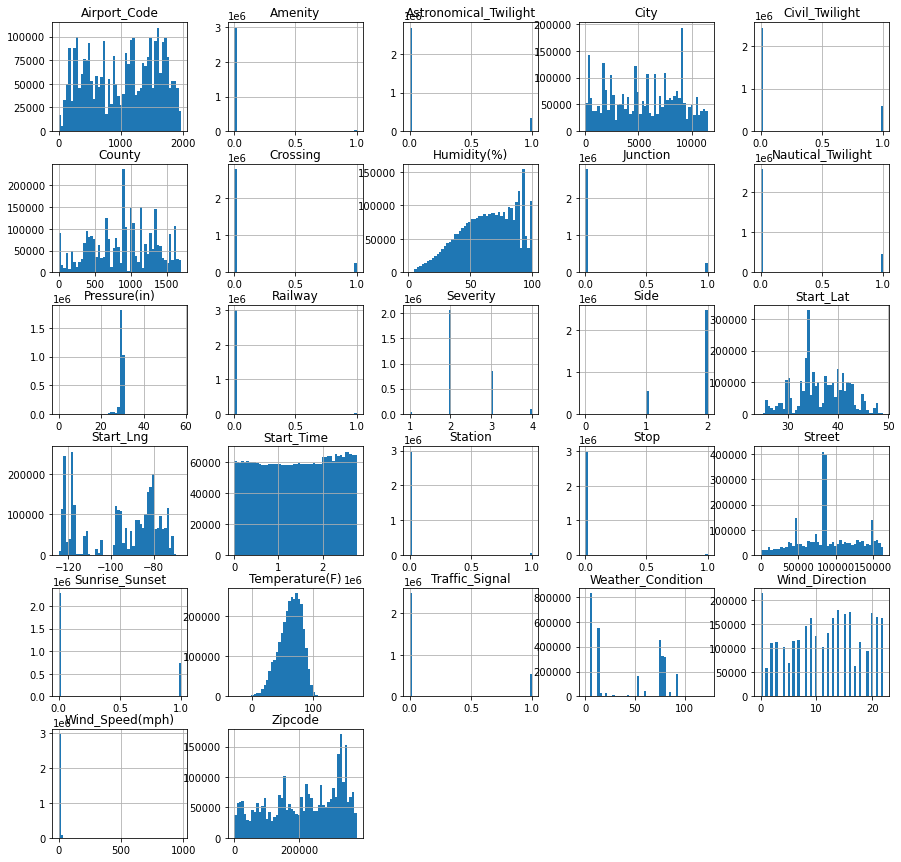

In [48]:
df.hist(bins=50, figsize=(15,15))
plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3033519 entries, 2 to 3513616
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             int32  
 2   Start_Lat              float64
 3   Start_Lng              float64
 4   Street                 int32  
 5   Side                   int32  
 6   City                   int32  
 7   County                 int32  
 8   State                  object 
 9   Zipcode                int32  
 10  Airport_Code           int32  
 11  Temperature(F)         float64
 12  Humidity(%)            float64
 13  Pressure(in)           float64
 14  Wind_Direction         int32  
 15  Wind_Speed(mph)        float64
 16  Weather_Condition      int32  
 17  Amenity                int64  
 18  Crossing               int64  
 19  Junction               int64  
 20  Railway                int64  
 21  Station                int64  
 22  Stop              

In [43]:
df.describe()

Severity    Start_Time     Start_Lat     Start_Lng        Street  \
count  3.033519e+06  3.033519e+06  3.033519e+06  3.033519e+06  3.033519e+06   
mean   2.332613e+00  1.408134e+06  3.656764e+01 -9.558495e+01  8.879352e+04   
std    5.504645e-01  8.094315e+05  4.948028e+00  1.720250e+01  3.880920e+04   
min    1.000000e+00  0.000000e+00  2.455527e+01 -1.246238e+02  0.000000e+00   
25%    2.000000e+00  7.020895e+05  3.356905e+01 -1.172966e+02  6.430800e+04   
50%    2.000000e+00  1.419508e+06  3.604750e+01 -9.043865e+01  8.502800e+04   
75%    3.000000e+00  2.121744e+06  4.056412e+01 -8.099274e+01  1.174150e+05   
max    4.000000e+00  2.771778e+06  4.900220e+01 -6.711317e+01  1.634420e+05   

               Side          City        County       Zipcode  Airport_Code  \
count  3.033519e+06  3.033519e+06  3.033519e+06  3.033519e+06  3.033519e+06   
mean   1.818988e+00  5.554379e+03  8.993583e+02  2.149408e+05  1.035252e+03   
std    3.850287e-01  3.246291e+03  4.382131e+02  1.091862e+05  5.468942e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.000000e+00  2.522000e+03  5.460000e+02  1.312090e+05  5.120000e+02   
50%    2.000000e+00  5.738000e+03  9.010000e+02  2.281550e+05  1.094000e+03   
75%    2.000000e+00  8.414000e+03  1.281000e+03  3.193790e+05  1.535000e+03   
max    2.000000e+00  1.149300e+04  1.703000e+03  3.772170e+05  1.973000e+03   

       ...      Crossing      Junction       Railway       Station  \
count  ...  3.033519e+06  3.033519e+06  3.033519e+06  3.033519e+06   
mean   ...  8.003675e-02  8.044255e-02  8.743641e-03  1.984725e-02   
std    ...  2.713501e-01  2.719771e-01  9.309776e-02  1.394752e-01   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    ...  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

               Stop  Traffic_Signal  Sunrise_Sunset  Civil_Twilight  \
count  3.033519e+06    3.033519e+06    3.033519e+06    3.033519e+06   
mean   1.479536e-02    1.808942e-01    2.448358e-01    1.974960e-01   
std    1.207330e-01    3.849306e-01    4.299899e-01    3.981098e-01   
min    0.000000e+00    0.000000e+00    0.000000e+00    0.000000e+00   
25%    0.000000e+00    0.000000e+00    0.000000e+00    0.000000e+00   
50%    0.000000e+00    0.000000e+00    0.000000e+00    0.000000e+00   
75%    0.000000e+00    0.000000e+00    0.000000e+00    0.000000e+00   
max    1.000000e+00    1.000000e+00    1.000000e+00    1.000000e+00   

       Nautical_Twilight  Astronomical_Twilight  
count       3.033519e+06           3.033519e+06  
mean        1.500053e-01           1.147463e-01  
std         3.570767e-01           3.187155e-01  
min         0.000000e+00           0.000000e+00  
25%         0.000000e+00           0.000000e+00  
50%         0.000000e+00           0.000000e+00  
75%         0.000000e+00           0.000000e+00  
max         1.000000e+00           1.000000e+00  

[8 rows x 27 columns]

In [44]:
df.corr()

Severity  Start_Time  Start_Lat  Start_Lng    Street  \
Severity               1.000000   -0.100475   0.050887   0.093073 -0.048979   
Start_Time            -0.100475    1.000000   0.030347  -0.058876 -0.124661   
Start_Lat              0.050887    0.030347   1.000000  -0.023498 -0.060919   
Start_Lng              0.093073   -0.058876  -0.023498   1.000000  0.089013   
Street                -0.048979   -0.124661  -0.060919   0.089013  1.000000   
Side                   0.172663   -0.015887   0.003702  -0.068829  0.081918   
City                  -0.024603    0.031026   0.085071  -0.137890 -0.005351   
County                -0.077977    0.018720   0.015372  -0.104804 -0.019217   
Zipcode               -0.085642    0.032732  -0.070233  -0.933058 -0.052658   
Airport_Code          -0.013844    0.009646   0.028199  -0.099835  0.001681   
Temperature(F)        -0.028191   -0.078399  -0.430597  -0.065191  0.011645   
Humidity(%)            0.034295    0.012906   0.042235   0.180338  0.025764   
Pressure(in)           0.037169   -0.361646  -0.105089   0.158830  0.050554   
Wind_Direction         0.025316   -0.215212   0.078090  -0.047784  0.010860   
Wind_Speed(mph)        0.035273   -0.111031   0.053537   0.084753  0.020764   
Weather_Condition      0.046997   -0.191672   0.010923   0.145705  0.039409   
Amenity               -0.043957   -0.009566   0.042230  -0.005185 -0.009908   
Crossing              -0.139626    0.013897  -0.023433   0.007892  0.019929   
Junction               0.059484   -0.024685   0.034146  -0.062726  0.003729   
Railway               -0.025140    0.005148   0.001169  -0.022321 -0.004007   
Station               -0.048027   -0.003992   0.016075  -0.010186 -0.008031   
Stop                  -0.052813    0.003538   0.011307  -0.040026  0.000448   
Traffic_Signal        -0.190968    0.007245  -0.094306   0.087053  0.036241   
Sunrise_Sunset         0.054974    0.034416   0.041391  -0.067499 -0.017171   
Civil_Twilight         0.061214    0.031843   0.037066  -0.078353 -0.022745   
Nautical_Twilight      0.067266    0.026854   0.030076  -0.083604 -0.026754   
Astronomical_Twilight  0.068455    0.022410   0.030814  -0.090821 -0.029652   

                           Side      City    County   Zipcode  Airport_Code  \
Severity               0.172663 -0.024603 -0.077977 -0.085642     -0.013844   
Start_Time            -0.015887  0.031026  0.018720  0.032732      0.009646   
Start_Lat              0.003702  0.085071  0.015372 -0.070233      0.028199   
Start_Lng             -0.068829 -0.137890 -0.104804 -0.933058     -0.099835   
Street                 0.081918 -0.005351 -0.019217 -0.052658      0.001681   
Side                   1.000000  0.017067 -0.006502  0.046142      0.021260   
City                   0.017067  1.000000  0.186153  0.077820      0.369819   
County                -0.006502  0.186153  1.000000  0.056957      0.216060   
Zipcode                0.046142  0.077820  0.056957  1.000000      0.067882   
Airport_Code           0.021260  0.369819  0.216060  0.067882      1.000000   
Temperature(F)        -0.002133 -0.016032  0.020632  0.084015     -0.005183   
Humidity(%)           -0.008251 -0.017466 -0.034384 -0.144954      0.017857   
Pressure(in)           0.002235 -0.002858  0.012628 -0.160333      0.025652   
Wind_Direction         0.009808 -0.002473  0.013948  0.025153     -0.000442   
Wind_Speed(mph)        0.003849 -0.001831 -0.042704 -0.049925      0.024088   
Weather_Condition      0.008000 -0.028223 -0.049414 -0.118089     -0.017731   
Amenity               -0.064781  0.002522  0.007743  0.004008     -0.032485   
Crossing              -0.102402  0.056131  0.032257  0.004752      0.024533   
Junction               0.128333  0.020919 -0.003971  0.036935      0.015256   
Railway               -0.021215 -0.006509 -0.009839  0.018981     -0.015502   
Station               -0.063711  0.011478  0.015025  0.011326      0.009138   
Stop                  -0.068353  0.026592  0.015115  0.038270      0.027

Text(0.5, 1.0, 'correlation coefficients')

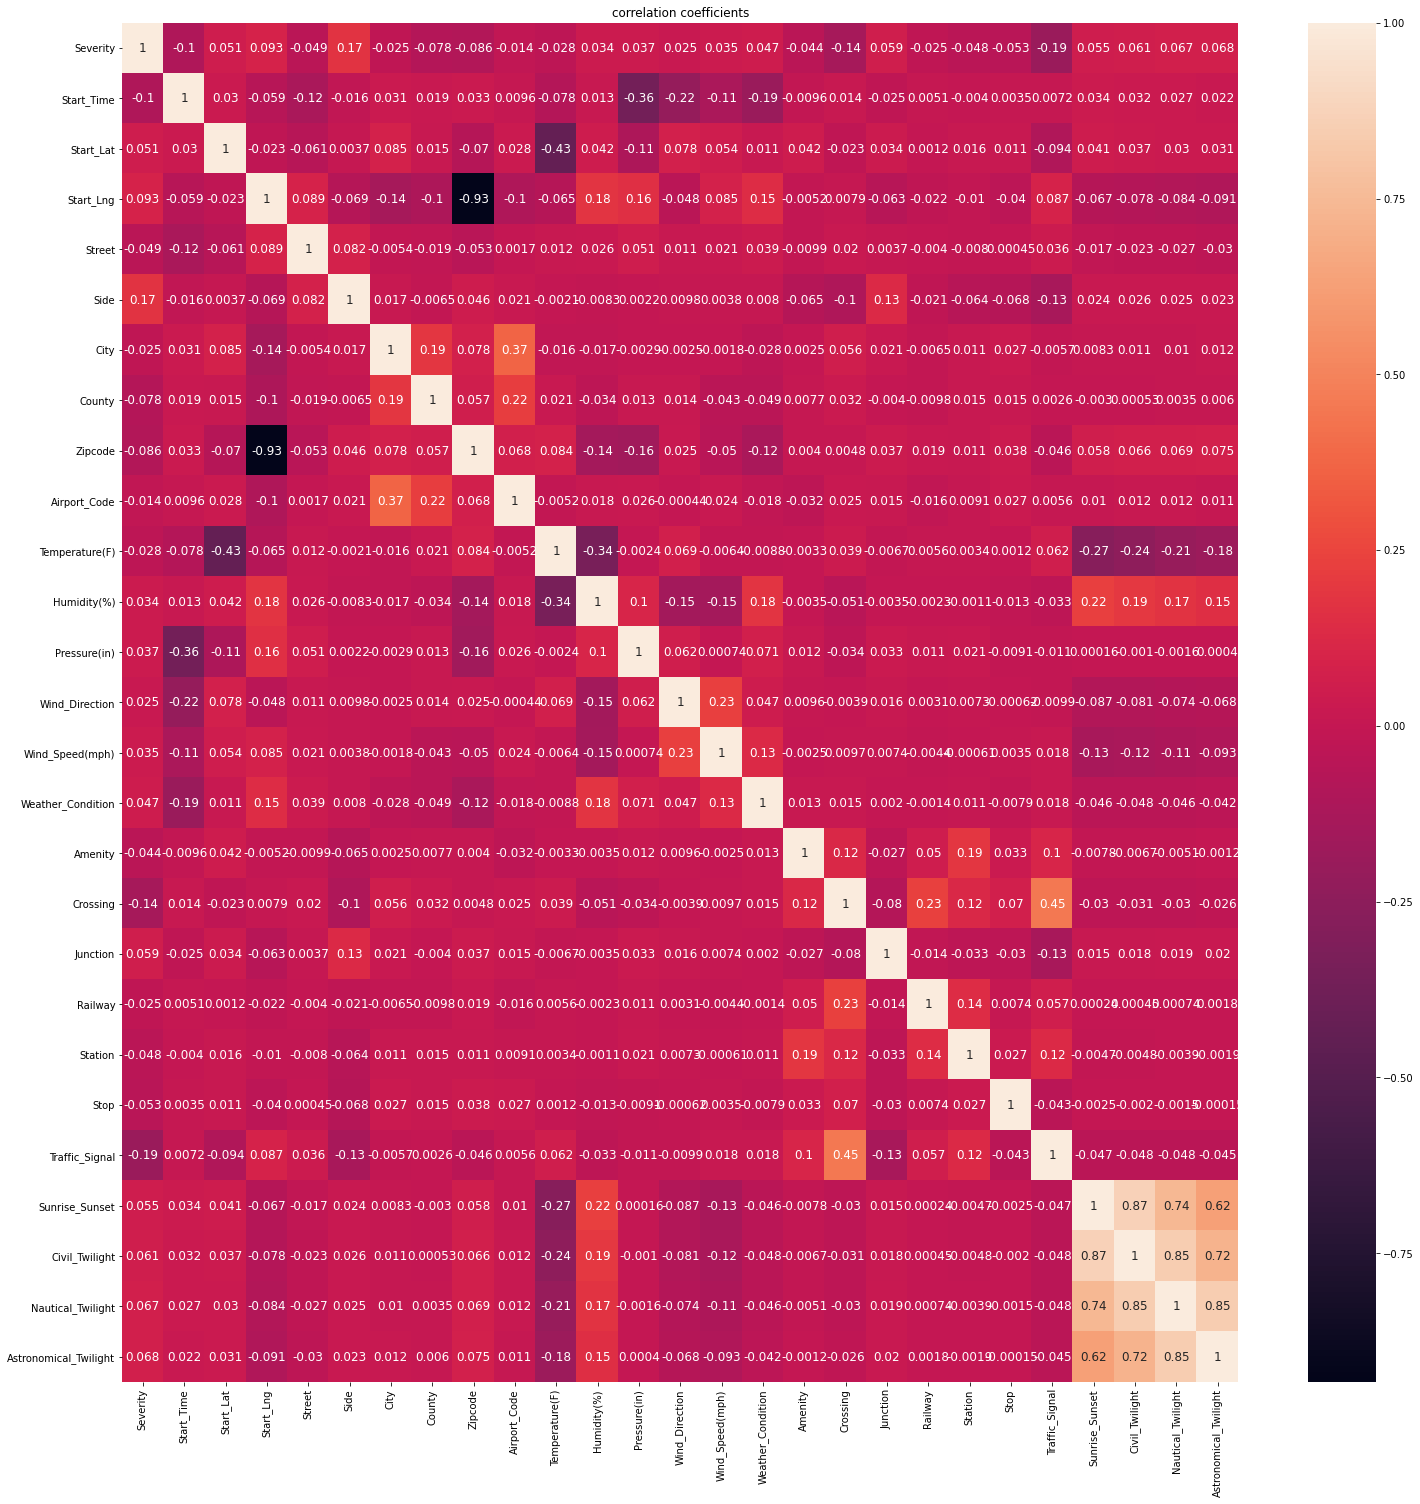

In [76]:
# HeatMap
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 12})
plt.title('correlation coefficients')

In [80]:
x=df.groupby(by='Severity').size()
x

Severity
1      28411
2    2062199
3     848418
4      94491
dtype: int64

In [81]:
x = pd.DataFrame(x)

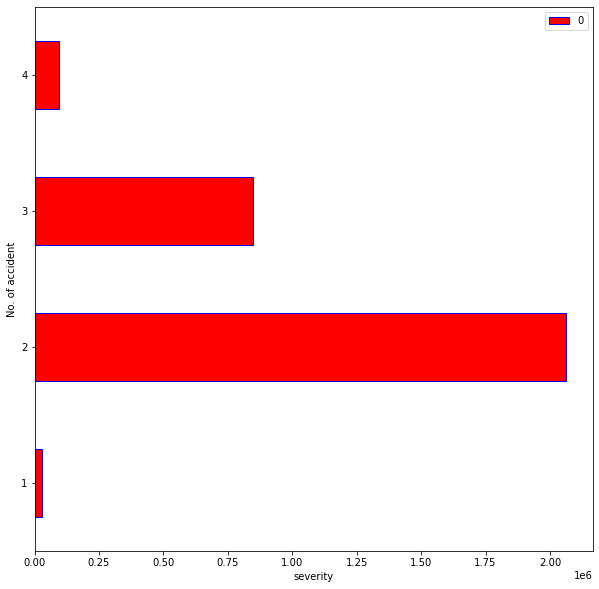

In [86]:
x.plot.barh(edgecolor ="b", color="r")
plt.ylabel('No. of accident')
plt.xlabel('severity')
plt.rcParams["figure.figsize"] = (10,10)

In [106]:
x=dataset_new5.groupby(by='State',).size()
print(x)

State
AL     39658
AR      1761
AZ     66609
CA    676011
CO     44322
CT     23170
DC      3760
DE      5448
FL    232315
GA     78958
IA     10215
ID      1731
IL     94171
IN     29650
KS      5167
KY     20563
LA     56046
MA     33304
MD     33364
ME      1991
MI     89508
MN     75693
MO     30606
MS      5678
MT       438
NC    142518
ND        39
NE     21457
NH      6827
NJ     48941
NM      4934
NV      8739
NY    144272
OH     59762
OK     56842
OR     78917
PA     88712
RI     10443
SC    146568
SD        59
TN     62076
TX    290733
UT     43547
VA     78063
VT       573
WA     58573
WI     18492
WV      1850
WY       445
dtype: int64


In [118]:
x=x.head(20)

In [107]:
x_sorted= x.sort_values(ascending=False)

Text(0.5, 0, 'States')

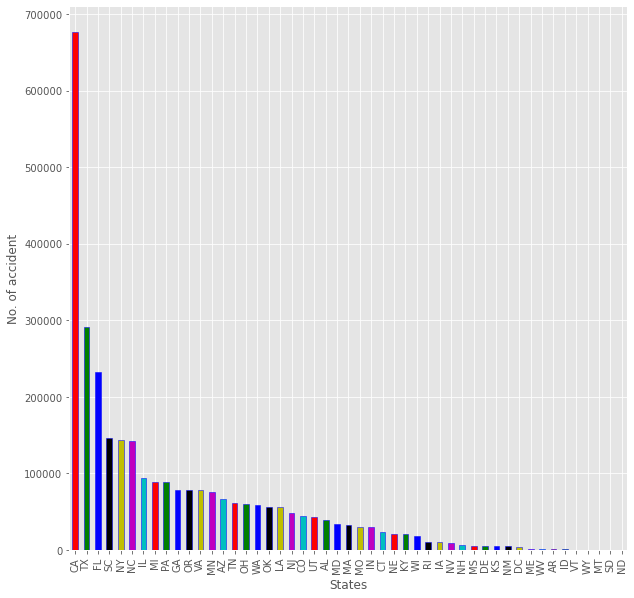

In [108]:

x_sorted.plot.bar(color=list('rgbkymc'),  edgecolor='blue')

plt.rcParams["figure.figsize"] = (10,10)
plt.ylabel('No. of accident')
plt.xlabel('States')

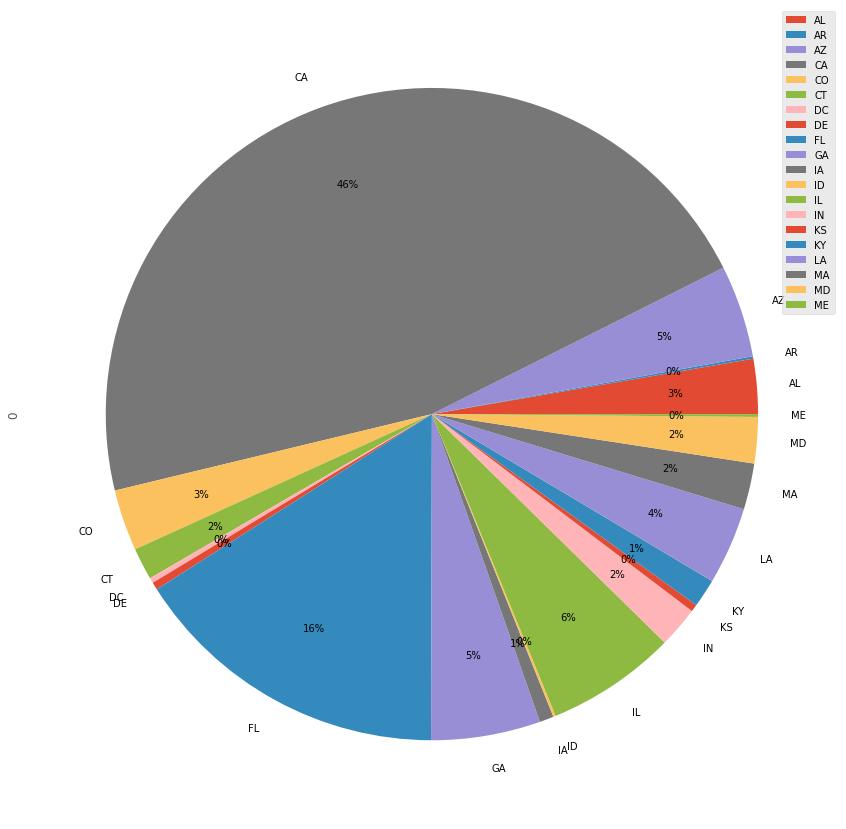

In [124]:
#state Pie Chart
df = pd.DataFrame(x)
plot = df.plot.pie(subplots=True,figsize=(15, 15),autopct='%1.0f%%',pctdistance=0.75, labeldistance=1.1)

In [92]:
states = dataset.State.unique()

In [95]:
count_by_state=[]
for i in dataset.State.unique():
    count_by_state.append(dataset[dataset['State']==i].count()['ID'])

In [51]:
statechart = pd.value_counts(dataset_new5['State'])
ax = go.Figure(data=go.Choropleth(locations=statechart.index, z = statechart.values.astype(float), locationmode = 'USA-states',colorscale = 'jet',colorbar_title = "No.of Accident",))
ax.update_layout(title_text = 'Statewise US accident', geo_scope='usa')
ax.show()


In [44]:
dataset['Start_Time'] = pd.to_datetime(dataset['Start_Time'])

In [45]:
dataset['Year'] = dataset['Start_Time'].dt.year
dataset.head()

ID    Source    TMC  Severity          Start_Time             End_Time  \
0  A-1  MapQuest  201.0         3 2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  MapQuest  201.0         2 2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  MapQuest  201.0         2 2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  MapQuest  201.0         3 2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  MapQuest  201.0         2 2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  ...  Station   Stop  \
0  39.865147 -84.058723      NaN      NaN  ...    False  False   
1  39.928059 -82.831184      NaN      NaN  ...    False  False   
2  39.063148 -84.032608      NaN      NaN  ...    False  False   
3  39.747753 -84.205582      NaN      NaN  ...    False  False   
4  39.627781 -84.188354      NaN      NaN  ...    False  False   

   Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0            False          False        False          Night          Night   
1            False          False        False          Night          Night   
2            False           True        False          Night          Night   
3            False          False        False          Night            Day   
4            False           True        False            Day            Day   

  Nautical_Twilight Astronomical_Twilight  Year  
0             Night                 Night  2016  
1             Night                   Day  2016  
2               Day                   Day  2016  
3               Day                   Day  2016  
4               Day                   Day  2016  

[5 rows x 50 columns]

In [87]:
x=df.groupby(by='City',).size()
x

City
0          3
1        225
2         15
3         30
4         25
        ... 
11489      1
11490     23
11491    133
11492      9
11493      5
Length: 11494, dtype: int64

In [136]:
x_sorted= x.sort_values(ascending=False)

In [137]:
x=x_sorted.head(10)

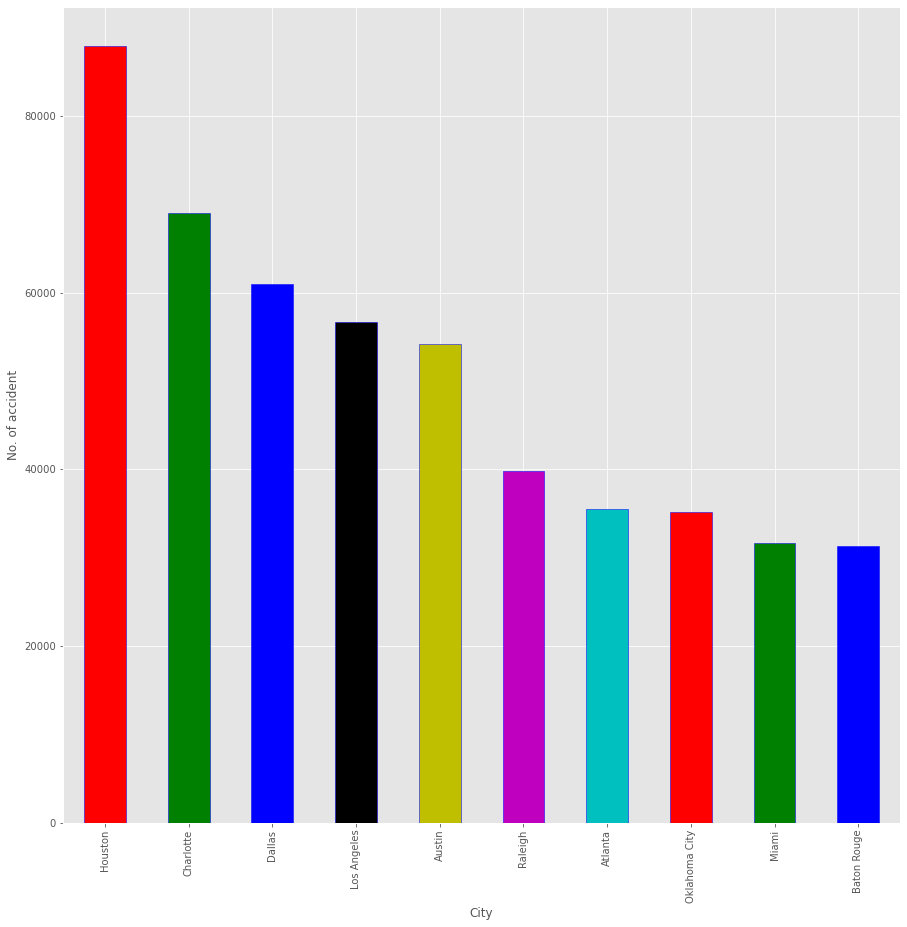

In [73]:
x.plot.bar(color=list('rgbkymc'),  edgecolor='blue')

plt.rcParams["figure.figsize"] = (10,10)
plt.ylabel('No. of accident')
plt.xlabel('City')
plt.rcParams["figure.figsize"] = (15,15)

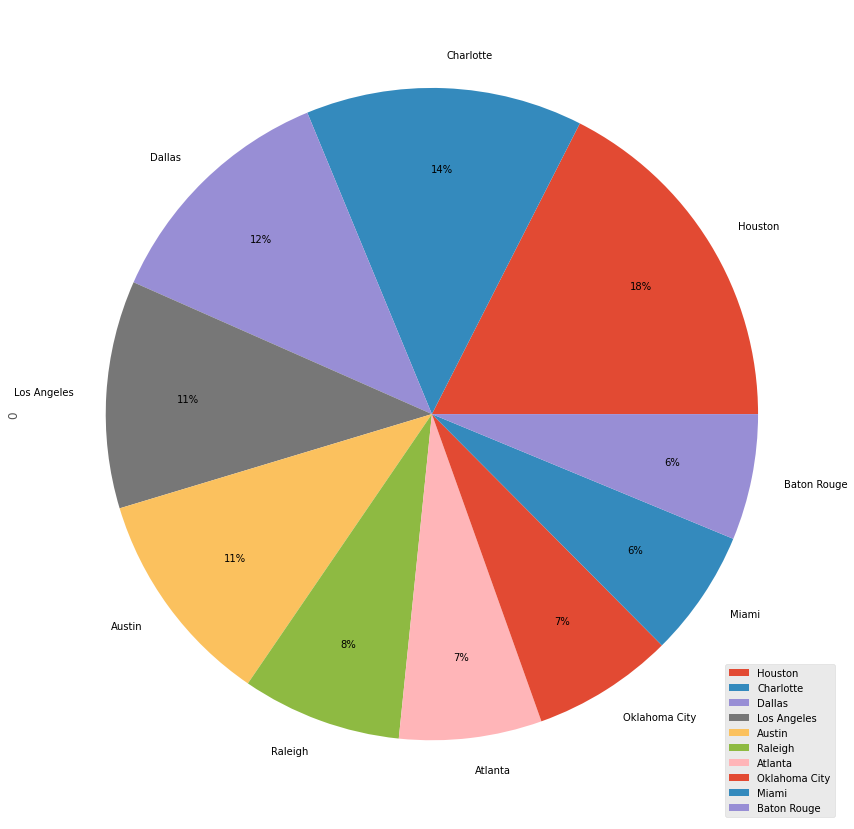

In [139]:
pieplot = pd.DataFrame(x)
plot = pieplot.plot.pie(subplots=True,figsize=(15, 15),autopct='%1.0f%%',pctdistance=0.75, labeldistance=1.1)

In [33]:
x = pd.DataFrame(x)

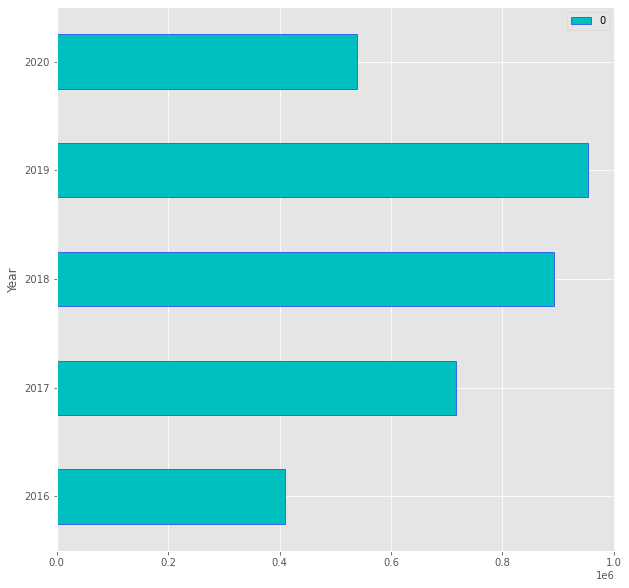

In [148]:
x.plot.barh(color=list('cmyk'),  edgecolor='blue')
plt.rcParams["figure.figsize"] = (10,10)

1       2       3      4
2016    225  269847  126178  14343
2017    282  461976  231081  24150
2018    259  574027  292562  25767
2019    203  687665  237794  28071
2020  28205  379695  111298  19989

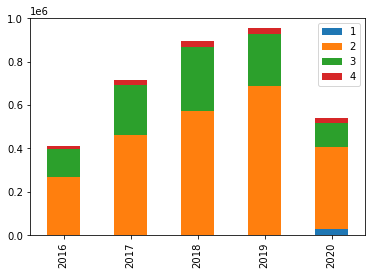

In [47]:
x_16 = dataset.loc[dataset['Year']==2016, :]['Severity'].value_counts()
x_17 = dataset.loc[dataset['Year']==2017, :]['Severity'].value_counts()
x_18 = dataset.loc[dataset['Year']==2018, :]['Severity'].value_counts()
x_19 = dataset.loc[dataset['Year']==2019, :]['Severity'].value_counts()
x_20 = dataset.loc[dataset['Year']==2020, :]['Severity'].value_counts()
df_plot  = pd.DataFrame([x_16,x_17,x_18,x_19,x_20])
df_plot.index=['2016','2017','2018','2019','2020']
df_plot.plot(kind='bar',stacked=True);
plt.rcParams["figure.figsize"] = (10,10)
df_plot

In [57]:
x=x.sample(10000)

In [54]:
x=x.reset_index

In [42]:
x=x.groupby(by='Severity').size()
x

Severity
1      29174
2    2373210
3     998913
4     112320
dtype: int64

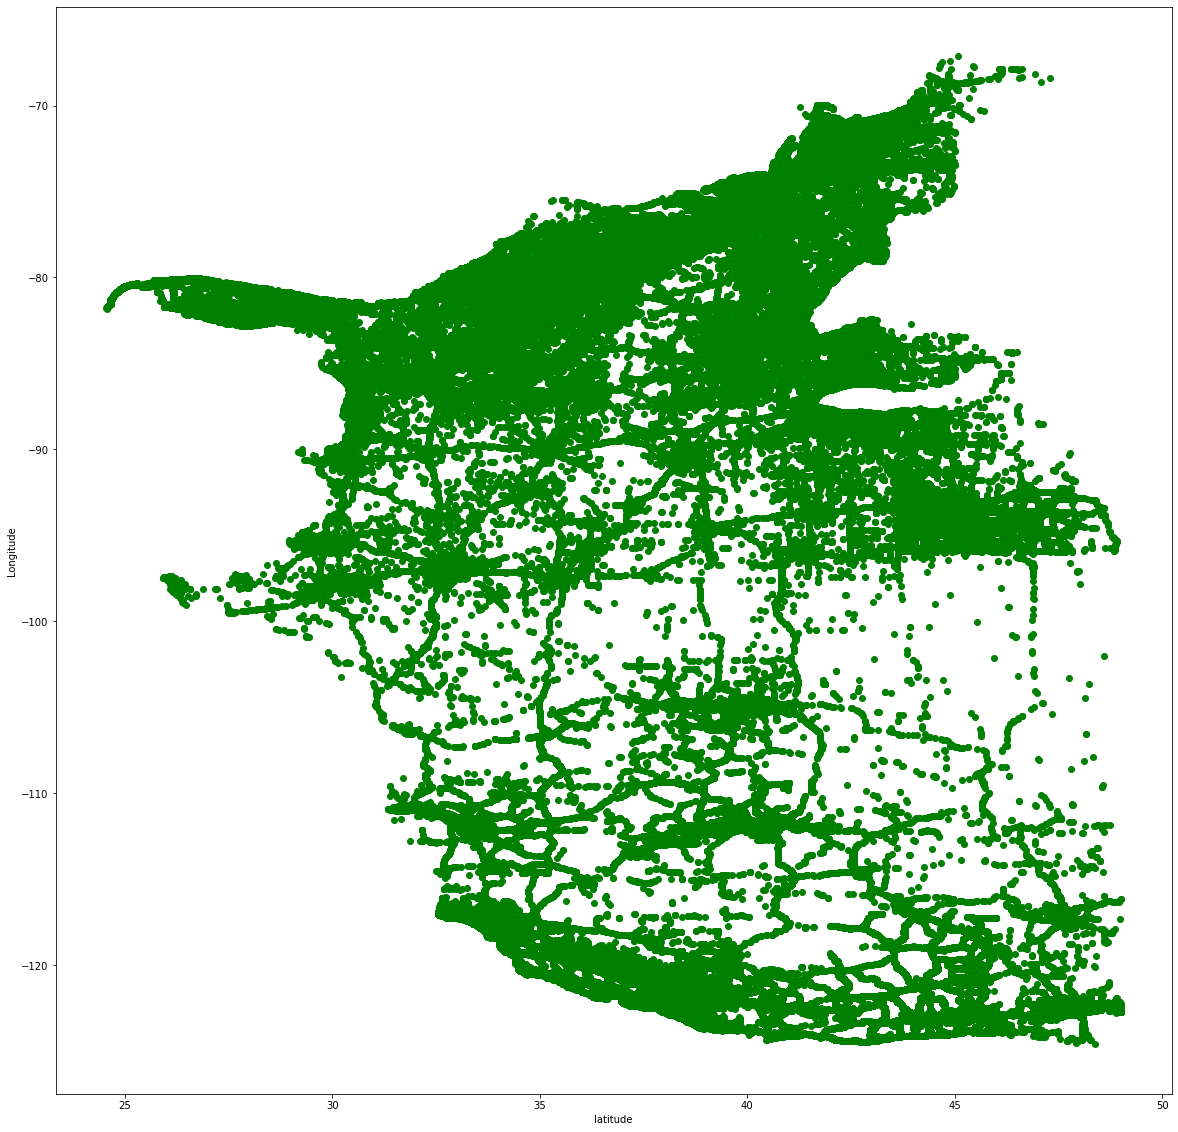

In [49]:
x=dataset.Start_Lat.values
y=dataset.Start_Lng.values

plt.scatter(x,y, c="g")
plt.xlabel('latitude')
plt.ylabel('Longitude')
plt.rcParams["figure.figsize"] = (20,20)
plt.show()



In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()